In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.optim as optim
import torch.nn.functional as F
from torch_lr_finder import LRFinder
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from torch import nn 

Data PreProcessing

In [12]:
train_dir = "train.csv"
test_dir = "test.csv"

train_set = pd.read_csv(train_dir)
test_set = pd.read_csv(test_dir)

target = 'smoking'

In [13]:
train_set.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [14]:
train_set.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


<AxesSubplot:>

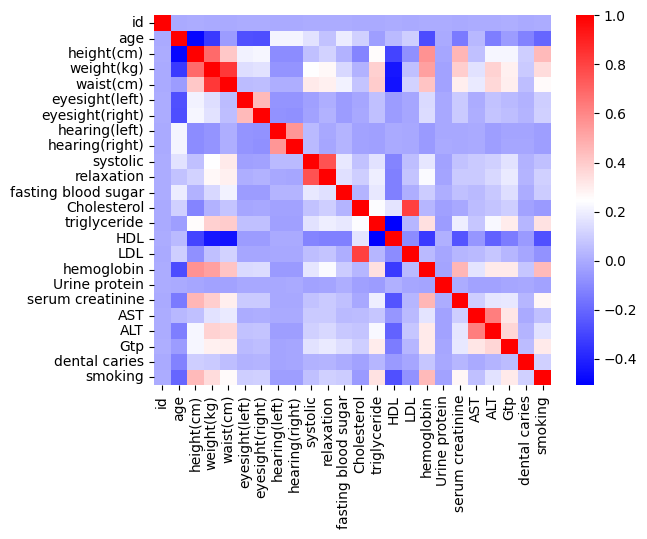

In [15]:
corr = train_set.corr()
sns.heatmap(corr , cmap = 'bwr')

In [ ]:
sns.swarmplot(x = train_set['smoking'] , y = train_set['hemoglobin'] , data = train_set , color = 'black')

In [16]:
train_set = train_set.drop('id' , axis = 1)
test_id = test_set['id']
test_set = test_set.drop('id' , axis = 1)

In [17]:
scaler = MinMaxScaler()
normalized_train_set = pd.DataFrame(scaler.fit_transform(train_set) , columns = train_set.columns)
normalized_test_set = pd.DataFrame(scaler.fit_transform(test_set) , columns = test_set.columns)
normalized_train_set.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0.538462,0.545455,0.30,0.394737,0.040816,0.051020,0.0,0.0,0.426471,0.483146,...,0.244094,0.039806,0.720497,0.0,0.091837,0.020725,0.008239,0.025075,0.0,1.0
1,0.769231,0.545455,0.35,0.500000,0.051020,0.061224,1.0,1.0,0.507353,0.438202,...,0.377953,0.067240,0.701863,0.0,0.102041,0.027202,0.007552,0.035105,1.0,0.0
2,0.000000,0.636364,0.45,0.394737,0.030612,0.040816,0.0,0.0,0.301471,0.348315,...,0.283465,0.049489,0.776398,0.0,0.071429,0.027202,0.010299,0.051153,0.0,1.0
3,0.230769,0.818182,0.65,0.710526,0.142857,0.112245,0.0,0.0,0.397059,0.494382,...,0.228346,0.054330,0.683230,0.0,0.091837,0.018135,0.008926,0.028084,1.0,0.0
4,0.153846,0.545455,0.30,0.388158,0.142857,0.091837,0.0,0.0,0.323529,0.359551,...,0.275591,0.049489,0.652174,0.0,0.071429,0.016839,0.004119,0.015045,0.0,1.0


Training

In [18]:
target = normalized_train_set['smoking']
target_name = normalized_train_set.columns[-1]

train_set = normalized_train_set.drop(target_name , axis=1)
print(len(train_set.columns))

test_set = normalized_test_set

22


In [19]:
x_train = torch.tensor(train_set.values , dtype=torch.float32)
y_train = torch.tensor(target.values , dtype=torch.float32)
y_train = y_train.unsqueeze(1)
x_test = torch.tensor(test_set.values , dtype=torch.float32)

train_dataset = TensorDataset(x_train , y_train)  
train_loader = DataLoader(train_dataset , batch_size = 16 , shuffle = True )

In [20]:
y_train

tensor([[1.],
        [0.],
        [1.],
        ...,
        [0.],
        [1.],
        [0.]])

In [21]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(22 , 128)
        self.fc2 = nn.Linear(128 , 64)
        self.fc3 = nn.Linear(64 , 1)
        
    def forward(self , x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x
    
model = BinaryClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters() , lr = 0.0001)

In [22]:
epochs = 30

for epoch in range(epochs):
    running_loss = 0.0
    losses = []
    for batch in train_loader:
        inputs , targets = batch
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs , targets)
        loss.backward()
        optimizer.step()
        losses.append(loss)
        running_loss+=loss
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_set)}")    
    
print("finished training")    

g:\kaggle_comp\smoke\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1, Loss: 0.032460831105709076
Epoch 2, Loss: 0.029877744615077972
Epoch 3, Loss: 0.029599003493785858
Epoch 4, Loss: 0.02948911115527153
Epoch 5, Loss: 0.029391342774033546
Epoch 6, Loss: 0.029319241642951965
Epoch 7, Loss: 0.029246699064970016
Epoch 8, Loss: 0.029184453189373016
Epoch 9, Loss: 0.029128490015864372
Epoch 10, Loss: 0.029054177924990654
Epoch 11, Loss: 0.029002059251070023
Epoch 12, Loss: 0.028932496905326843
Epoch 13, Loss: 0.028870530426502228
Epoch 14, Loss: 0.028811555355787277
Epoch 15, Loss: 0.02876763790845871
Epoch 16, Loss: 0.0287264883518219
Epoch 17, Loss: 0.028672916814684868
Epoch 18, Loss: 0.028637802228331566
Epoch 19, Loss: 0.028590235859155655
Epoch 20, Loss: 0.028577277436852455
Epoch 21, Loss: 0.02855144999921322
Epoch 22, Loss: 0.028516734018921852
Epoch 23, Loss: 0.02848525159060955
Epoch 24, Loss: 0.028472470119595528
Epoch 25, Loss: 0.028455199673771858
Epoch 26, Loss: 0.028432339429855347
Epoch 27, Loss: 0.028406541794538498
Epoch 28, Loss: 

In [23]:
checkpoint = {
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}

torch.save(checkpoint, 'NN_model_checkpoint.pth')


In [24]:
test_set = torch.tensor(test_set.values , dtype = torch.float32)
test_set

tensor([[0.3077, 0.5455, 0.4000,  ..., 0.0082, 0.0301, 0.0000],
        [0.9231, 0.4545, 0.3000,  ..., 0.0038, 0.0221, 0.0000],
        [0.6154, 0.6364, 0.4000,  ..., 0.0203, 0.0341, 0.0000],
        ...,
        [0.2308, 0.6364, 0.5500,  ..., 0.0106, 0.0221, 1.0000],
        [0.3077, 0.4545, 0.3000,  ..., 0.0120, 0.0301, 0.0000],
        [0.4615, 0.2727, 0.2000,  ..., 0.0034, 0.0150, 1.0000]])

In [25]:
model.eval()
with torch.no_grad():
    predictions = model(test_set)

In [26]:
predictions = predictions.squeeze(1)
predictions

tensor([0.5426, 0.3093, 0.4109,  ..., 0.5227, 0.0815, 0.0094])

In [27]:
df = pd.DataFrame({
    'id': test_id,
    'smoking': predictions
})

# Save to CSV
df.to_csv('predictions.csv', index=False)

In [28]:
df.head(-1)

,id,smoking
0,159256,0.542589
1,159257,0.309256
2,159258,0.410913
3,159259,0.018460
4,159260,0.646600
...,...,...
106165,265421,0.754395
106166,265422,0.553814
106167,265423,0.748477
106168,265424,0.522655
